In [1]:
!pip install tensorflow==2.13.0

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split as tts
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm

In [4]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/Training'
n_train_glioma = len(os.listdir(f'{train_dir}/glioma'))
n_train_mening = len(os.listdir(f'{train_dir}/meningioma'))
n_train_pit = len(os.listdir(f'{train_dir}/pituitary'))
n_train_non = len(os.listdir(f'{train_dir}/notumor'))


# Total length of the whole classes combined
total_train = n_train_glioma + n_train_mening + n_train_pit + n_train_non

In [5]:
# Count length
count = [n_train_glioma, n_train_mening, n_train_pit, n_train_non, total_train]
length = ['glioma', ' meningioma', 'pituitary', 'no tumor', 'total images']

for i, sum in zip(length, count):
  print(f'Total counts of {i} is {sum}')
  print(100*'-')

Total counts of glioma is 1317
----------------------------------------------------------------------------------------------------
Total counts of  meningioma is 1331
----------------------------------------------------------------------------------------------------
Total counts of pituitary is 1457
----------------------------------------------------------------------------------------------------
Total counts of no tumor is 1595
----------------------------------------------------------------------------------------------------
Total counts of total images is 5700
----------------------------------------------------------------------------------------------------


In [6]:
class_labels = ['Glioma', 'Meningioma', 'Pituitary', 'No Tumor']
class_counts = [n_train_glioma, n_train_mening, n_train_pit, n_train_non]

<ipython-input-7-ea309d3e31b6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_labels, y=class_counts, palette="viridis")


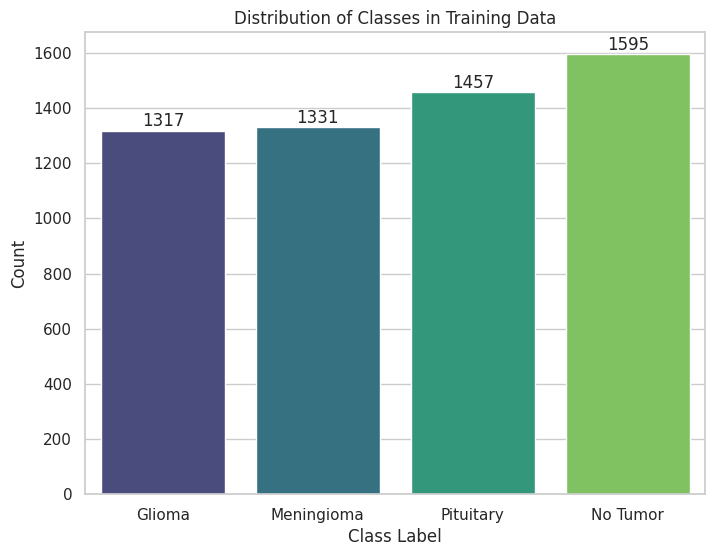

In [7]:
# Create a countplot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=class_labels, y=class_counts, palette="viridis")

# Annotate the counts on top of the bars
for i, count in enumerate(class_counts):
    ax.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=12)

plt.title("Distribution of Classes in Training Data")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

In [8]:
test_dir="/content/drive/MyDrive/Colab Notebooks/Testing"

n_test_glioma = len(os.listdir(f'{test_dir}/glioma'))
n_test_mening = len(os.listdir(f'{test_dir}/meningioma'))
n_test_pit = len(os.listdir(f'{test_dir}/pituitary'))
n_test_non = len(os.listdir(f'{test_dir}/notumor'))


# Total length of the whole classes combined
total_test = n_test_glioma + n_test_mening + n_test_pit + n_test_non

In [9]:
# Count length
count = [n_test_glioma, n_test_mening, n_test_pit, n_test_non, total_test]
length = ['glioma', ' meningioma', 'pituitary', 'no tumor', 'total images']

for i, sum in zip(length, count):
  print(f'Total counts of {i} is {sum}')
  print(100*'-')

Total counts of glioma is 300
----------------------------------------------------------------------------------------------------
Total counts of  meningioma is 306
----------------------------------------------------------------------------------------------------
Total counts of pituitary is 300
----------------------------------------------------------------------------------------------------
Total counts of no tumor is 405
----------------------------------------------------------------------------------------------------
Total counts of total images is 1311
----------------------------------------------------------------------------------------------------


<ipython-input-10-bcf986257a76>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_labels, y=class_counts, palette="viridis")


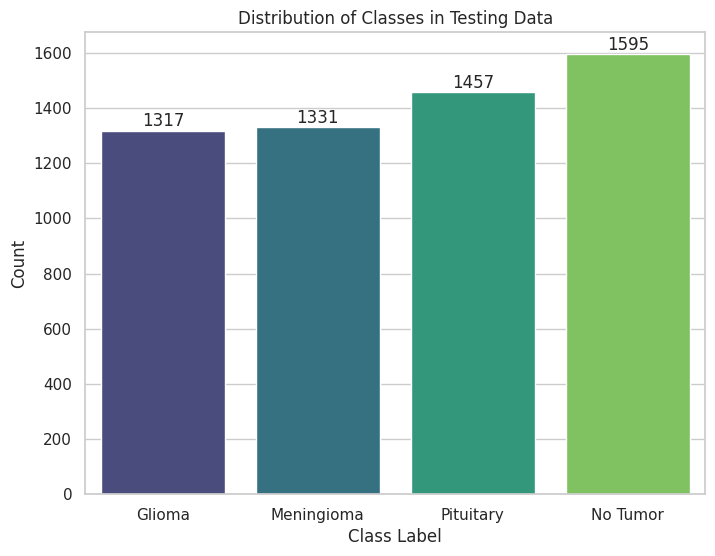

In [10]:
# Create a countplot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=class_labels, y=class_counts, palette="viridis")

# Annotate the counts on top of the bars
for i, count in enumerate(class_counts):
    ax.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=12)

plt.title("Distribution of Classes in Testing Data")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

In [11]:
#Data generator on training and testing set

train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=40,
                                 width_shift_range=0.05,
                                 height_shift_range=0.05,
                                 zoom_range=0.1,
                                 shear_range=0.1,
                                 horizontal_flip=True,
                                 vertical_flip=False,
                                 fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
#Creating Training set and validation set
training_set=train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=16,
                                               class_mode='categorical')

test_set=test_datagen.flow_from_directory(test_dir,
                                          target_size=(224,224),
                                          batch_size=16,
                                          class_mode="categorical")

Found 5700 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [13]:
batch_size=16
color_channel=3
image_shape=(224,224,3)

In [14]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3, ResNet101
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, LSTM, Conv2D, MaxPooling2D, MaxPool2D, Flatten, Dense, Dropout, Reshape, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=image_shape)


for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(class_labels), activation='softmax')(x)

# Create the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()




87910968/87910968 [==============================] - 3s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_10 (Conv2D)          (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization_4 (Bat  (None, 111, 111, 32)         96        ['conv2d_10[0][0]']           
 chNormalization)                                                                                 
                                                                                                  
 activation (Activation)     

In [ ]:
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/Datagen1/InceptionV3.h5', monitor='val_accuracy', save_best_only=True)


history = model.fit(
    training_set,
    epochs=25,
    validation_data=test_set,
    callbacks=[checkpoint]
)


Epoch 1/25
357/357 [==============================] - ETA: 0s - loss: 0.6989 - accuracy: 0.7472

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


357/357 [==============================] - 189s 518ms/step - loss: 0.6989 - accuracy: 0.7472 - val_loss: 0.5574 - val_accuracy: 0.7696
Epoch 2/25
357/357 [==============================] - 173s 484ms/step - loss: 0.4982 - accuracy: 0.8132 - val_loss: 0.4571 - val_accuracy: 0.8284
Epoch 3/25
357/357 [==============================] - 173s 483ms/step - loss: 0.4559 - accuracy: 0.8258 - val_loss: 0.4132 - val_accuracy: 0.8482
Epoch 4/25
357/357 [==============================] - 169s 474ms/step - loss: 0.4143 - accuracy: 0.8412 - val_loss: 0.3827 - val_accuracy: 0.8535
Epoch 5/25
357/357 [==============================] - 168s 469ms/step - loss: 0.4005 - accuracy: 0.8467 - val_loss: 0.3869 - val_accuracy: 0.8513
Epoch 6/25
357/357 [==============================] - 168s 472ms/step - loss: 0.3834 - accuracy: 0.8530 - val_loss: 0.3728 - val_accuracy: 0.8619
Epoch 7/25
357/357 [==============================] - 167s 467ms/step - loss: 0.3777 - accuracy: 0.8504 - val_loss: 0.3857 - val_accura

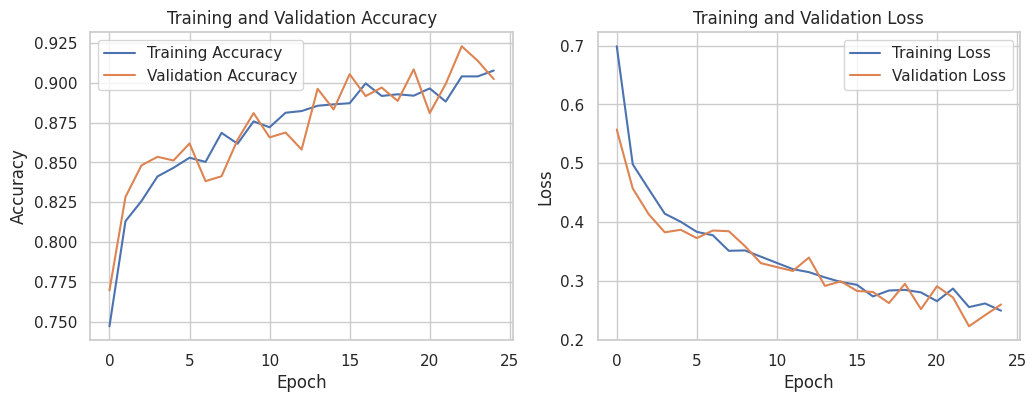

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=image_shape)


for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(4, activation='softmax')
])

171446536/171446536 [==============================] - 6s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 7, 7, 2048)        42658176  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 42666372 (162.76 MB)
Trainable params: 8196 (32.02 KB)
Non-trainable params: 42658176 (162.73 MB)
_________________________________________________________________


In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/Datagen1/Resnet101.h5', monitor='val_accuracy', save_best_only=True)


history = model.fit(
    training_set,
    epochs=50,
    validation_data=test_set,
    callbacks=[checkpoint]
)

Epoch 1/50
357/357 [==============================] - ETA: 0s - loss: 1.1110 - accuracy: 0.5263

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


357/357 [==============================] - 2916s 8s/step - loss: 1.1110 - accuracy: 0.5263 - val_loss: 1.0901 - val_accuracy: 0.5698
Epoch 2/50
357/357 [==============================] - 522s 1s/step - loss: 1.0088 - accuracy: 0.6023 - val_loss: 1.0470 - val_accuracy: 0.5622
Epoch 3/50
357/357 [==============================] - 519s 1s/step - loss: 0.9525 - accuracy: 0.6309 - val_loss: 0.9847 - val_accuracy: 0.6384
Epoch 4/50
357/357 [==============================] - 528s 1s/step - loss: 0.9167 - accuracy: 0.6547 - val_loss: 0.9685 - val_accuracy: 0.6400
Epoch 5/50
357/357 [==============================] - 516s 1s/step - loss: 0.8888 - accuracy: 0.6535 - val_loss: 0.9331 - val_accuracy: 0.6369
Epoch 6/50
357/357 [==============================] - 523s 1s/step - loss: 0.8645 - accuracy: 0.6632 - val_loss: 0.9045 - val_accuracy: 0.6468
Epoch 7/50
357/357 [==============================] - 525s 1s/step - loss: 0.8511 - accuracy: 0.6695 - val_loss: 0.9009 - val_accuracy: 0.6712
Epoch 8/5

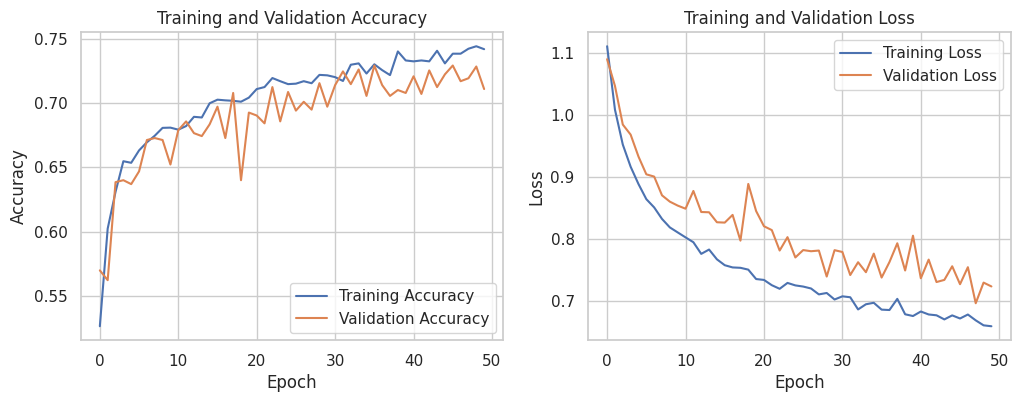

In [20]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()



In [29]:
# Define the model
model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=image_shape))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
model.add(BatchNormalization())

# Block 2
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
model.add(BatchNormalization())

# Block 3
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
model.add(BatchNormalization())

# Block 4
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(class_labels), activation='softmax'))


In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_21 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 batch_normalization_8 (Bat  (None, 112, 112, 64)      256       
 chNormalization)                                                
                                                                 
 conv2d_22 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_23 (Conv2D)          (None, 112, 112, 128)    

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/Datagen1/VGG16.h5', monitor='val_accuracy', save_best_only=True)



# Train the model
history1 = model.fit(
    training_set,
    epochs=10,
    validation_data=test_set,
    callbacks=[checkpoint]
)

Epoch 1/10
357/357 [==============================] - 1771s 5s/step - loss: 2.0266 - accuracy: 0.4833 - val_loss: 3.0815 - val_accuracy: 0.2784
Epoch 2/10
357/357 [==============================] - 1777s 5s/step - loss: 1.2719 - accuracy: 0.4386 - val_loss: 1.4387 - val_accuracy: 0.4088
Epoch 3/10
357/357 [==============================] - 1782s 5s/step - loss: 1.2640 - accuracy: 0.3912 - val_loss: 1.6579 - val_accuracy: 0.4638
Epoch 4/10
357/357 [==============================] - 1776s 5s/step - loss: 1.1716 - accuracy: 0.4535 - val_loss: 1.7875 - val_accuracy: 0.4272
Epoch 5/10
357/357 [==============================] - 1768s 5s/step - loss: 1.1298 - accuracy: 0.4481 - val_loss: 1.4294 - val_accuracy: 0.3097
Epoch 6/10
357/357 [==============================] - 1767s 5s/step - loss: 1.1070 - accuracy: 0.4872 - val_loss: 1.2353 - val_accuracy: 0.4600
Epoch 7/10
357/357 [==============================] - 1782s 5s/step - loss: 1.1678 - accuracy: 0.4637 - val_loss: 1.7510 - val_accuracy:

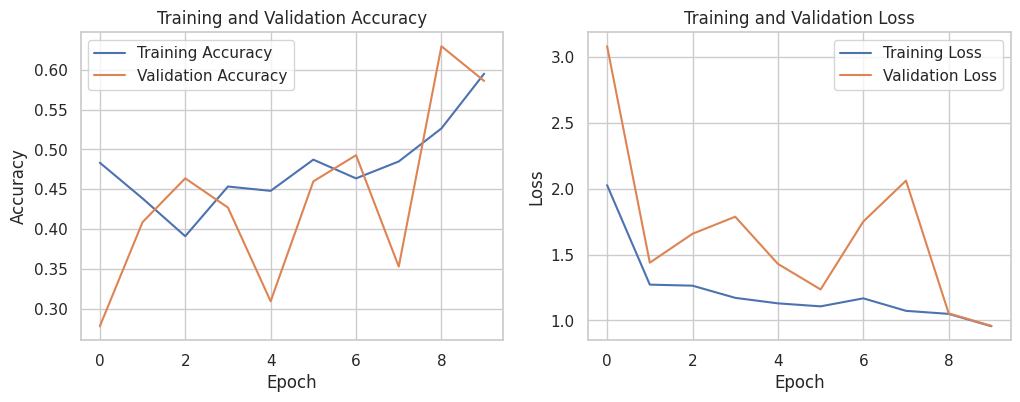

In [32]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

In [33]:
import os
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score

In [34]:
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
image_size = 224
x_test = []
y_test = []

In [35]:
for label in labels:
    testingpath = os.path.join('/content/drive/MyDrive/Colab Notebooks/Testing', label)
    for file in os.listdir(testingpath):
        image = cv2.imread(os.path.join(testingpath, file), cv2.IMREAD_COLOR)
        image = cv2.resize(image, (image_size, image_size))
        x_test.append(image)
        y_test.append(labels.index(label))
x_test = np.array(x_test) / 255.0
y_test = np.array(y_test)

y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=len(labels))


In [36]:
vgg_model_path = '/content/drive/MyDrive/Colab Notebooks/Datagen1/VGG16.h5'
inception_model_path = '/content/drive/MyDrive/Colab Notebooks/Datagen1/InceptionV3.h5'
resnet_model_path = '/content/drive/MyDrive/Colab Notebooks/Datagen1/Resnet101.h5'


In [37]:
vgg_model = tf.keras.models.load_model(vgg_model_path)
inception_model = tf.keras.models.load_model(inception_model_path)
resnet_model = tf.keras.models.load_model(resnet_model_path)
# Function to evaluate model
def evaluate_model(model, x_test, y_test, y_test_categorical, labels):
    predictions = model.predict(x_test)
    y_pred = np.argmax(predictions, axis=1)
    y_true = np.argmax(y_test_categorical, axis=1)

    # Classification report
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=labels))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

VGG Model Evaluation:
41/41 [==============================] - 99s 2s/step
Classification Report:
              precision    recall  f1-score   support

      glioma       0.62      0.79      0.70       300
  meningioma       0.42      0.08      0.13       306
     notumor       0.60      0.94      0.73       405
   pituitary       0.78      0.63      0.70       300

    accuracy                           0.63      1311
   macro avg       0.61      0.61      0.56      1311
weighted avg       0.60      0.63      0.57      1311



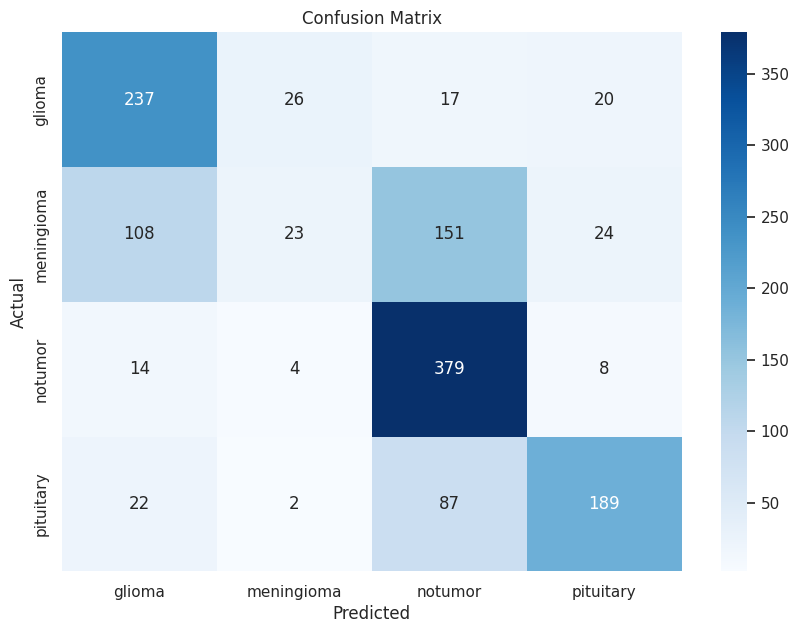

In [38]:
# Evaluate model
print("VGG Model Evaluation:")
evaluate_model(vgg_model, x_test, y_test, y_test_categorical, labels)

41/41 [==============================] - 31s 720ms/step
Classification Report:
              precision    recall  f1-score   support

      glioma       0.88      0.90      0.89       300
  meningioma       0.88      0.82      0.85       306
     notumor       0.99      0.98      0.98       405
   pituitary       0.91      0.97      0.94       300

    accuracy                           0.92      1311
   macro avg       0.92      0.92      0.92      1311
weighted avg       0.92      0.92      0.92      1311



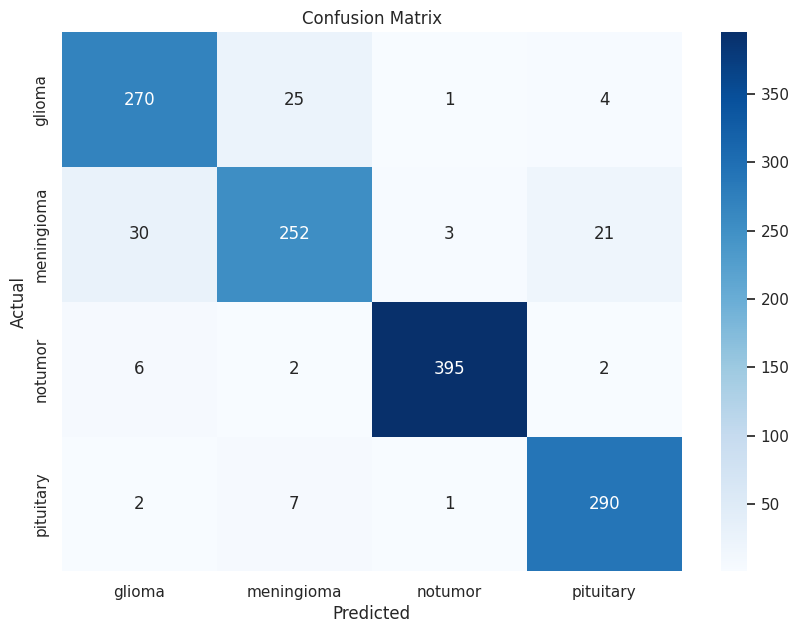

In [23]:
evaluate_model(inception_model, x_test, y_test, y_test_categorical, labels)

41/41 [==============================] - 90s 2s/step
Classification Report:
              precision    recall  f1-score   support

      glioma       0.70      0.64      0.67       300
  meningioma       0.59      0.44      0.50       306
     notumor       0.82      0.84      0.83       405
   pituitary       0.70      0.92      0.79       300

    accuracy                           0.72      1311
   macro avg       0.70      0.71      0.70      1311
weighted avg       0.71      0.72      0.71      1311



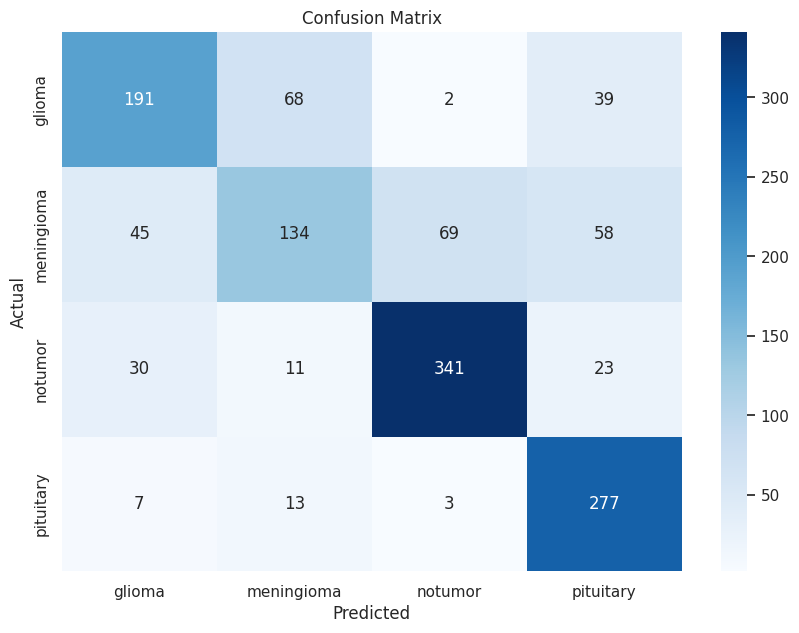

In [24]:
evaluate_model(resnet_model, x_test, y_test, y_test_categorical, labels)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf

labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
image_size = 224
image_path = '/content/drive/MyDrive/Colab Notebooks/Testing/meningioma/Te-meTr_0001.jpg'
check_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
check_image = cv2.resize(check_image, (image_size, image_size))
check_image = np.expand_dims(check_image, axis=0) / 255.0


model_path = '/content/drive/MyDrive/Colab Notebooks/Datagen2/Inceptionv3.h5'
model = tf.keras.models.load_model(model_path)


prediction = model.predict(check_image)
predicted_index = np.argmax(prediction[0])
predicted_class = labels[predicted_index]
confidence = prediction[0][predicted_index]


print('Result: ', predicted_class)

1/1 [==============================] - 1s 1s/step
Result:  meningioma
